# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings 

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization



### Necessary Library Requirements:

#### Same as Lab1:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 sklearn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![pic0](pics/pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1) #frac: what how many propotion of raw data
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [7]:
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carrie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[Text(0, 0, 'just'),
 Text(1, 0, 'like'),
 Text(2, 0, 'amp'),
 Text(3, 0, 'people'),
 Text(4, 0, 'time'),
 Text(5, 0, 'day'),
 Text(6, 0, 'know'),
 Text(7, 0, 'love'),
 Text(8, 0, 'good'),
 Text(9, 0, 'did'),
 Text(10, 0, 'watch'),
 Text(11, 0, 'think'),
 Text(12, 0, 'ca'),
 Text(13, 0, 'got'),
 Text(14, 0, 'make'),
 Text(15, 0, 've'),
 Text(16, 0, 'today'),
 Text(17, 0, 'happy'),
 Text(18, 0, 'want'),
 Text(19, 0, 'lost'),
 Text(20, 0, 'live'),
 Text(21, 0, 'life'),
 Text(22, 0, 'really'),
 Text(23, 0, 'need'),
 Text(24, 0, 'll'),
 Text(25, 0, 'feel'),
 Text(26, 0, 'let'),
 Text(27, 0, 'way'),
 Text(28, 0, 'amazing'),
 Text(29, 0, 'going')]

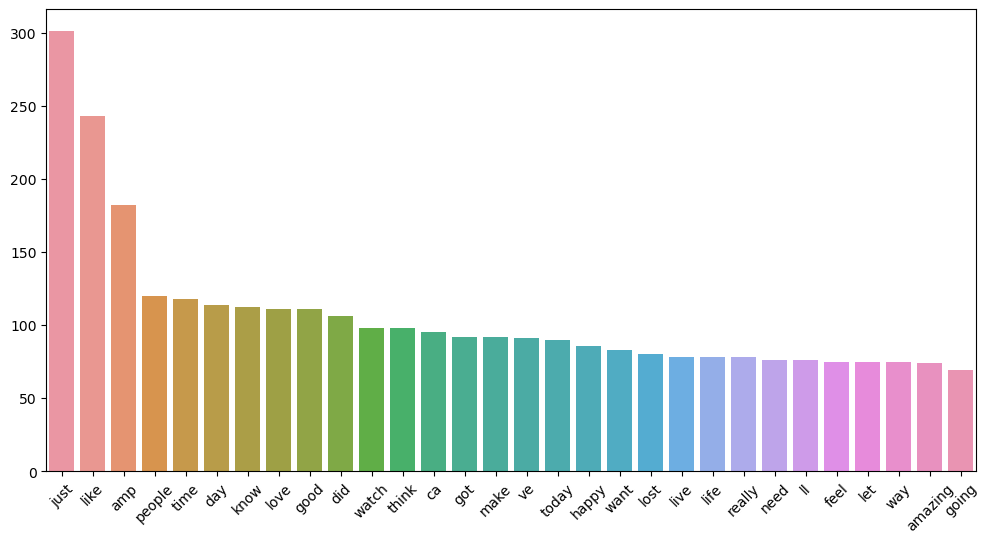

In [22]:
nltk.download('punkt')
train_df['unigrams'] = train_df['text'].apply(lambda x: dmh.tokenize_text(x))
unigrams_list = [' '.join(unigram) for unigram in train_df.unigrams]
count_vect = CountVectorizer(stop_words='english') #use parameter to recognize english stop words
train_df_counts = count_vect.fit_transform(unigrams_list) #get the sparse matrix

word_list = ["term_"+str(i) for i in count_vect.get_feature_names_out()]
doc_list = ["doc_"+ str(i) for i in list(train_df.index)]

data_TF = []
for j in range(0,train_df_counts.shape[1]):
    data_TF.append(sum(train_df_counts[:,j].toarray())) 
data_TF = np.asarray(train_df_counts.sum(axis=0))[0]  #get word frequency list

sorted_indices = np.argsort(data_TF)[::-1] #sort by word frequency

plt.figure(figsize=(12, 6))
g = sns.barplot(x=count_vect.get_feature_names_out()[sorted_indices][:30], 
            y=data_TF[sorted_indices][:30])
g.set_xticklabels(count_vect.get_feature_names_out()[sorted_indices][:30], rotation = 45)

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [23]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [24]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [25]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

In [69]:
test_df.groupby(['emotion']).count()['text']

emotion
anger       84
fear       110
joy         79
sadness     74
Name: text, dtype: int64

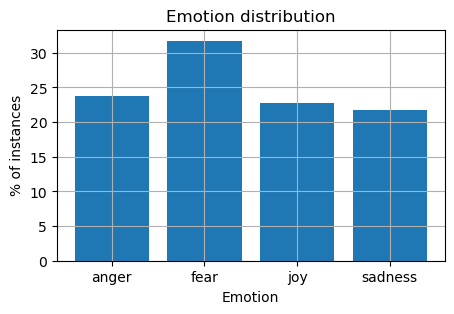

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [29]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [30]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [31]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [32]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [34]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

In [40]:
print("Vocabulary:", BOW_vectorizer.get_feature_names_out())

Vocabulary: ['00' '000' '00pm' ... 'य_ब' 'सत' 'アニメ']


The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [35]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [41]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carrie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
import nltk

# build analyzers (bag-of-words)
# BOW_vectorizer = CountVectorizer() #have evey feature, and use defult tokenize
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\carrie\Anaconda\envs\py38\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [37]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [44]:
print("Vocabulary:", BOW_500.get_feature_names_out())

Vocabulary: ['!' '#' '$' '%' '&' "'" "'d" "'ll" "'m" "'re" "'s" "'ve" '(' ')' '*' ','
 '-' '--' '.' '..' '...' '....' '.....' '1' '2' '3' '4' ':' ';' '?' '@'
 '\\n' '\\n\\n' 'a' 'about' 'absolutely' 'actually' 'afraid' 'after'
 'again' 'against' 'alarm' 'all' 'already' 'also' 'always' 'am' 'amazing'
 'amp' 'an' 'and' 'anger' 'angry' 'animated' 'another' 'anxiety' 'any'
 'anyone' 'anything' 'are' 'around' 'as' 'asked' 'ass' 'at' 'away' 'awe'
 'awful' 'back' 'bad' 'bb18' 'bc' 'be' 'because' 'been' 'before' 'being'
 'believe' 'best' 'better' 'big' 'bit' 'bitter' 'black' 'blues' 'boiling'
 'both' 'break' 'bright' 'broadcast' 'bully' 'burning' 'burst' 'but' 'by'
 'ca' 'call' 'can' 'car' 'care' 'change' 'cheer' 'cheerful' 'cheerfully'
 'cheering' 'cheery' 'come' 'comes' 'could' 'country' 'cry' 'customer'
 'dark' 'day' 'days' 'delight' 'depressing' 'depression' 'despair' 'did'
 'discouraged' 'do' 'does' 'doing' 'done' 'down' 'dreadful' 'dull' 'eat'
 'either' 'elated' 'end' 'even' 'ever' 'ever

In [39]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [57]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TFIDF_1000.fit(train_df['text'])

train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

## check dimension
train_data_TFIDF_features_1000.shape

(3613, 1000)

In [59]:
TFIDF_1000.get_feature_names_out()[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [86]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [87]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'anger', 'fear', 'sadness', 'sadness', 'fear', 'sadness',
       'fear', 'sadness', 'anger'], dtype=object)

---
## 4. Results Evaluation

In [327]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Sample sentences
sentences = ["This is the first sentence.", "This is the second sentence.", "And here is the third sentence."]

# Step 1: Tokenize sentences into words
tokenized_sentences = [nltk.word_tokenize(sentence.lower()) for sentence in sentences]

# Step 2: Calculate TF-IDF values
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(tokens) for tokens in tokenized_sentences])

# Step 3: Load Word2Vec model (pre-trained or train your own)
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Step 4: Multiply Word2Vec vectors by TF-IDF values
sentence_embeddings = []
for i, tokens in enumerate(tokenized_sentences):
    embedding = sum(word2vec_model.wv[word] * tfidf_matrix[i, tfidf_vectorizer.vocabulary_.get(word, 0)] for word in tokens if word in word2vec_model.wv)
    sentence_embeddings.append(embedding)

# Step 5: Display the resulting sentence embeddings
for i, embedding in enumerate(sentence_embeddings):
    print(f"Sentence {i + 1} Embedding:", embedding)

Sentence 1 Embedding: [-1.2646359e-02  2.3148532e-03 -8.8325748e-03  4.9505597e-03
  7.7181384e-03 -2.5561252e-03 -1.9378019e-03  9.8599643e-03
 -5.5565685e-03 -1.6490626e-03 -3.7961750e-04 -2.0333501e-03
 -2.0377312e-03  2.2514316e-03  2.8624982e-03  2.9003769e-03
  8.5319234e-03  9.1568148e-04 -8.4247824e-04 -6.0932320e-03
 -2.7220539e-04 -5.4911454e-03  5.6648557e-03 -2.0186068e-04
  5.5125644e-03 -2.0338749e-03 -8.4588514e-04  1.3219109e-02
 -7.6548057e-03  1.4077453e-03  1.4387068e-02 -1.9990555e-03
 -2.3237872e-03 -2.3854563e-03 -1.5459320e-03  3.9573349e-03
  5.5944771e-03  5.4736724e-03  1.2604496e-03  1.0036674e-02
  5.6957817e-03  5.2836398e-04 -7.9160742e-03  2.7441781e-03
  5.6341868e-03  3.8796244e-03  3.3178884e-03  1.4202886e-03
  2.6140634e-03  8.6258445e-04  8.4088100e-03  2.6468528e-03
 -2.3295905e-03 -2.2183580e-03 -4.2667836e-03 -7.5568799e-03
 -3.6407541e-03 -1.5431659e-03  1.9611465e-03 -3.6995709e-03
 -9.1686402e-04  3.5574923e-03  1.1106735e-02 -2.3627330e-03
 -

Now we will check the results of our model's performance

In [88]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.68


In [89]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [90]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [91]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

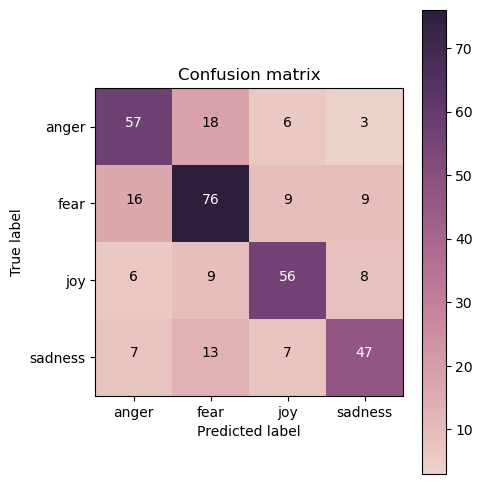

In [92]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [93]:
# Answer here
'''由confusion matrix可以看出，每一種情緒的testing data，模型能預測到至少8成
但或多或少都有預測錯誤的部分，可能是文字的表達方式比較不同...等原因導致
單看confusion matrix的數字可能會覺得 fear 答對的數字最多(76)
但其實 fear 在training data跟 testing data 都是資料最多的情緒
搭配precision, recall, f1-score 去觀察，會發現其實是 joy 類的表現較好'''

'由confusion matrix可以看出，每一種情緒的testing data，模型能預測到至少8成\n但或多或少都有預測錯誤的部分，可能是文字的表達方式比較不同...等原因導致\n單看confusion matrix的數字可能會覺得 fear 答對的數字最多(76)\n但其實 fear 在training data跟 testing data 都是資料最多的情緒\n搭配precision, recall, f1-score 去觀察，會發現其實是 joy 類的表現較好'

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [99]:
# Answer here
from sklearn.naive_bayes import BernoulliNB
NB_model = BernoulliNB()

NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'anger', 'joy', 'sadness', 'sadness', 'fear', 'sadness',
       'sadness', 'sadness', 'anger'], dtype='<U7')

In [100]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [101]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.61      0.68      0.64        84
        fear       0.74      0.76      0.75       110
         joy       0.81      0.68      0.74        79
     sadness       0.66      0.65      0.65        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.70       347
weighted avg       0.71      0.70      0.70       347



In [102]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 13  5  9]
 [15 84  3  8]
 [10  7 54  8]
 [11 10  5 48]]


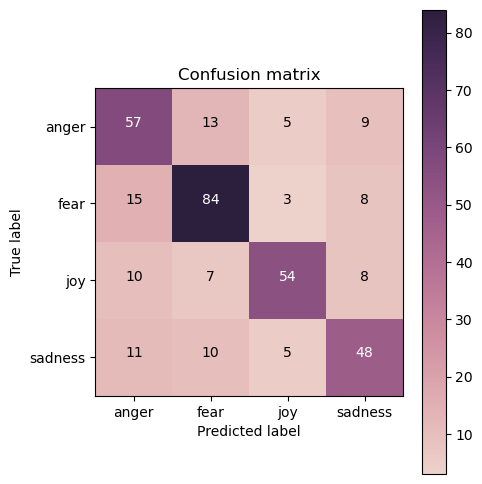

In [103]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here
'''
觀察兩個模型的混淆矩陣，可以看出 NB 的準確率較高
而在 NB 的預測結果，anger, fear, sadness 這三個負面情緒，被判斷為 joy 的數量也減少
所以我個人的意見認為，NB_model優於DT_model

另一方面從模型在 training data 跟 testing data 的 accuracy 觀察
DT:  training accuracy: 0.99; testing accuracy: 0.68
NB:  training accuracy: 0.79; testing accuracy: 0.70
可以判斷 DT 可能有點 overfitting，在遇到與訓練資料較相似的資料，能表現比較好
雖然目前看起來是 NB 的表現較好，但 training accuracy僅0.79，可能模型訓練的還不足夠
'''

Confusion Matrix of Decision Tree
![cm_DT](pics_carrie/cm_DT.png) 
Confusion Matrix of Naive Bayes
![cm_NB](pics_carrie/cm_NB.png) 

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [106]:
import keras

# standardize name (X, y) 
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

##input dimension will be 500 neurons

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [107]:
## deal with label (string -> one-hot)
## the emotion (ylabel) was string, which is model can not receive
## four-dimension label, each dimension symbols one emotion
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3136    sadness
1146       fear
641       anger
334       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [108]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

#between each of layers, there's an activate function (like ReLU or softmax)
#activate functions make our linear transformation of each neuron into nun-linear transformation
#predict curve (let prediction more flexible)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [109]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

### 6.4 Train

In [110]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25 #train same data 25 times
batch_size = 32 #average loss between 32 datas

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 0s 1ms/step - loss: 1.3284 - accuracy: 0.3731 - val_loss: 1.2719 - val_accuracy: 0.4496
Epoch 2/25
113/113 [==============================] - 0s 711us/step - loss: 0.9860 - accuracy: 0.6421 - val_loss: 0.9058 - val_accuracy: 0.6571
Epoch 3/25
113/113 [==============================] - 0s 717us/step - loss: 0.5747 - accuracy: 0.8015 - val_loss: 0.7632 - val_accuracy: 0.7003
Epoch 4/25
113/113 [==============================] - 0s 715us/step - loss: 0.4114 - accuracy: 0.8492 - val_loss: 0.7533 - val_accuracy: 0.6859
Epoch 5/25
113/113 [==============================] - 0s 714us/step - loss: 0.3202 - accuracy: 0.8849 - val_loss: 0.7980 - val_accuracy: 0.6916
Epoch 6/25
113/113 [==============================] - 0s 706us/step - loss: 0.2610 - accuracy: 0.9123 - val_loss: 0.8338 - val_accuracy: 0.7061
Epoch 7/25
113/113 [==============================] - 0s 734us/step - loss: 0.2130 - accuracy: 0.9305 - val_loss: 0.8913 - val_accuracy: 0

### 6.5 Predict on testing data

In [111]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 997us/step


array([[2.91596649e-08, 9.99976873e-01, 1.11135803e-08, 2.31112917e-05],
       [9.92120266e-01, 1.18054112e-03, 6.69788802e-03, 1.35351570e-06],
       [1.43281044e-03, 8.78537774e-01, 1.16556786e-01, 3.47266463e-03],
       [6.60488295e-05, 9.96574640e-01, 1.09271490e-07, 3.35918088e-03],
       [1.96503095e-07, 1.65436795e-04, 1.10284653e-08, 9.99834299e-01]],
      dtype=float32)

In [112]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'anger', 'fear', 'fear', 'sadness'], dtype=object)

In [113]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.69


In [114]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.373097,1.328449,0.449568,1.271886
1,1,0.642126,0.986006,0.657061,0.905802
2,2,0.801550,0.574650,0.700288,0.763181
3,3,0.849156,0.411371,0.685879,0.753288
4,4,0.884860,0.320201,0.691643,0.797975
5,5,0.912261,0.261047,0.706052,0.833815
6,6,0.930529,0.212993,0.691643,0.891276
7,7,0.940769,0.180704,0.691643,0.971492
8,8,0.957099,0.148511,0.668588,0.996529
9,9,0.957376,0.137931,0.680115,1.061670


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

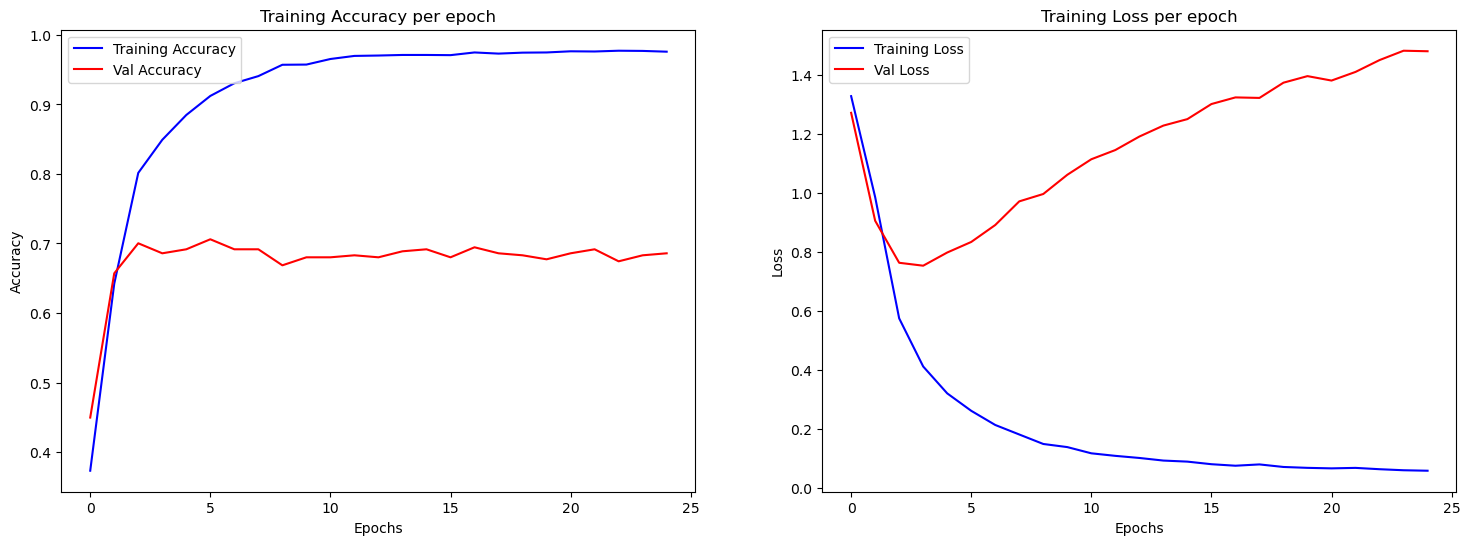

In [129]:
# Answer here
'''
觀察下面兩張圖，可以發現Training Accuracy很高，趨近於1，且Training Loss很低。
但是Validation的Accuracy沒有明顯進步，Loss雖一度下降，但後面又持續升高
可以判斷模型現在是Overfitting的狀態，將Training Data記住了，但無法預測其他資料
'''
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['accuracy'], color='blue')
plt.plot(training_log['epoch'], training_log['val_accuracy'], color='red')
plt.title("Training Accuracy per epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Val Accuracy"],loc=2)

plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['loss'], color='blue')
plt.plot(training_log['epoch'], training_log['val_loss'], color='red')
plt.title("Training Loss per epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training Loss","Val Loss"],loc=2)

plt.show()

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [131]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3136,40309,For a team as big as Bayern and the they like ...,"[For, a, team, as, big, as, Bayern, and, the, ..."
1146,20289,"@PanicAtTheDisco hey, y'all announced it like ...","[@, PanicAtTheDisco, hey, ,, y'all, announced,..."
641,10641,you are an angry glass of vodka,"[you, are, an, angry, glass, of, vodka]"
334,10334,I'm not used to pretty girls that use curse wo...,"[I, 'm, not, used, to, pretty, girls, that, us..."
2826,30822,@DamnPatriot You're a POS for rejoicing in som...,"[@, DamnPatriot, You, 're, a, POS, for, rejoic..."


In [132]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['For', 'a', 'team', 'as', 'big', 'as', 'Bayern', 'and', 'the', 'they', 'like', 'to', 'play', 'football', ',', 'their', 'pitch', 'is', 'fucking', 'dreadful', '.', 'Certainly', 'no', 'Emirates', 'pitch', 'anyway', '.']),
       list(['@', 'PanicAtTheDisco', 'hey', ',', "y'all", 'announced', 'it', 'like', 'immediately', 'after', 'I', 'asked', '.', 'Nice', '.', 'Thanks', "y'all", '#', 'panic']),
       list(['you', 'are', 'an', 'angry', 'glass', 'of', 'vodka'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [136]:
from gensim.models import Word2Vec

## setting
vector_dim = 100 #use how many dimension to represent a word
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [137]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.8372623 ,  0.34258837,  0.02185379,  0.04307884, -0.14300717,
       -0.90132034,  0.6962803 ,  1.1412227 ,  0.12051916, -0.11967923,
       -0.4594654 , -0.8398298 , -0.49090096,  0.10768596, -0.18340217,
       -0.43682277,  0.5739564 , -0.58271456,  0.29096022, -1.0701233 ,
        0.403549  ,  0.9277399 ,  0.51185966,  0.06266734,  0.42188028,
        0.13484019, -0.6765788 ,  0.14010394, -0.47184297,  0.00172617,
        0.17155005,  0.04102762,  0.7444157 , -0.91590583,  0.21502024,
        0.55351186,  0.2020412 ,  0.03980133, -0.7674467 , -0.30206466,
        0.06630292, -0.24813506, -0.4591118 ,  0.11798603,  0.5517474 ,
       -0.23592553, -0.9423076 ,  0.5945193 ,  0.6261617 ,  0.28842255,
       -0.463847  , -0.93215615, -0.10922889,  0.11470569, -0.5853035 ,
       -0.3424144 ,  0.31547847,  0.15132478, -0.03763604,  0.40896568,
        0.32349288, -0.5501909 ,  0.95579416,  0.24915391, -0.754802  ,
        0.658197  ,  0.27799287,  0.71802646, -1.3170843 ,  0.50

In [138]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9261012673377991),
 ('bday', 0.9211008548736572),
 ('PumpkinSpice', 0.9137647747993469),
 ('Be', 0.9135828614234924),
 ('smile', 0.9103137850761414),
 ('blessed', 0.9092787504196167),
 ('help', 0.9053346514701843),
 ('See', 0.9037067294120789),
 ('cats', 0.9009067416191101),
 ('blessing', 0.8963713645935059)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [201]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [140]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.917618453502655),
 ('miss', 0.9164499640464783),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [202]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [203]:
glove_twitter_25_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('meets', 0.8841923475265503),
 ('prince', 0.832163393497467),
 ('queen', 0.8257461190223694),
 ('’s', 0.817409873008728),
 ('crow', 0.813499391078949),
 ('hunter', 0.8131037950515747),
 ('father', 0.8115834593772888),
 ('soldier', 0.81113600730896),
 ('mercy', 0.8082393407821655),
 ('hero', 0.8082263469696045)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [236]:
print("110", train_df['emotion'][110], train_df['text_tokenized'][110])
print("150", train_df['emotion'][150], train_df['text_tokenized'][150])
print("959", train_df['emotion'][959], train_df['text_tokenized'][959])
print("2179", train_df['emotion'][2179], train_df['text_tokenized'][2179])

110 anger ['@', 'jennylhowe', 'I', 'am', 'angry', 'at', 'the', 'student', 'for', 'being', 'a', 'racist', ',', 'and', 'the', 'teacher', 'for', 'not', 'stopping', 'it', ',', 'and', 'at', 'the', 'class', 'for', 'letting', 'it', 'go', 'by', '.']
150 anger ['straight', 'people', 'are', 'canoodling', 'on', 'the', 'quad', 'and', 'I', "'m", '#', 'offended']
959 fear ['I', 'dread', 'this', 'drive', 'every', 'Wednesday', '😩']
2179 joy ['There', 'is', 'something', 'v', 'satisfying', 'about', 'opening', 'an', 'old', "'to", "do'.doc", 'file', 'and', 'being', 'able', 'to', 'check', 'off', 'all', 'the', 'things', 'you', 'have', 'done', '#', 'smiling']


In [231]:
sentence_vecs_110 = [word2vec_model.wv[word] for word in train_df['text_tokenized'][110]]
average_vector_110 = np.mean(sentence_vecs_110, axis=0)
sentence_vecs_150 = [word2vec_model.wv[word] for word in train_df['text_tokenized'][150]]
average_vector_150 = np.mean(sentence_vecs_150, axis=0)
sentence_vecs_959 = [word2vec_model.wv[word] for word in train_df['text_tokenized'][959]]
average_vector_959 = np.mean(sentence_vecs_959, axis=0)
sentence_vecs_2179 = [word2vec_model.wv[word] for word in train_df['text_tokenized'][2179]]
average_vector_2179 = np.mean(sentence_vecs_2179, axis=0)

In [232]:
from numpy.linalg import norm
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = norm(vector1)
    norm_vector2 = norm(vector2)

    similarity = dot_product / (norm_vector1 * norm_vector2)

    return similarity

In [233]:
print("Word2Vec Model")
print("between angry and angry:", cosine_similarity(average_vector_110, average_vector_150))
print("between angry and fear :", cosine_similarity(average_vector_110, average_vector_959))
print("between angry and joy :", cosine_similarity(average_vector_110, average_vector_2179))

Word2Vec Model
between angry and angry: 0.9550733
between angry and fear : 0.91277885
between angry and joy : 0.97148204


In [234]:
average_vector_110 = w2v_google_model.get_mean_vector(train_df['text_tokenized'][110])
average_vector_150 = w2v_google_model.get_mean_vector(train_df['text_tokenized'][150])
average_vector_959 = w2v_google_model.get_mean_vector(train_df['text_tokenized'][959])
average_vector_2127 = w2v_google_model.get_mean_vector(train_df['text_tokenized'][2127])
average_vector_2179 = w2v_google_model.get_mean_vector(train_df['text_tokenized'][2179])

In [235]:
print("Google Model")
print("between angry and angry:", cosine_similarity(average_vector_110, average_vector_150))
print("between angry and fear:", cosine_similarity(average_vector_110, average_vector_959))
print("between angry and joy:", cosine_similarity(average_vector_110, average_vector_2179))

Google Model
between angry and angry: 0.74216914
between angry and fear: 0.69943017
between angry and joy: 0.80984634


In [209]:
'''
查詢到可以使用平均的方式，但看起來效果並不穩定，我們舉出的例子angry跟angry的相似度低於angry跟happy的相似度
不過同樣的句子使用google model得到的結果也是一樣的，所以可能平均的方法不是個好方法
'''

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [262]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [263]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![Imgur](pics/pic6.png)

In [264]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [265]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [295]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


In [296]:
# make 24 words plot on a 2D plan
# give each group different color so that we can recognize them

### 9.2 Plot using t-SNE (2-dimension)

(224, 300)


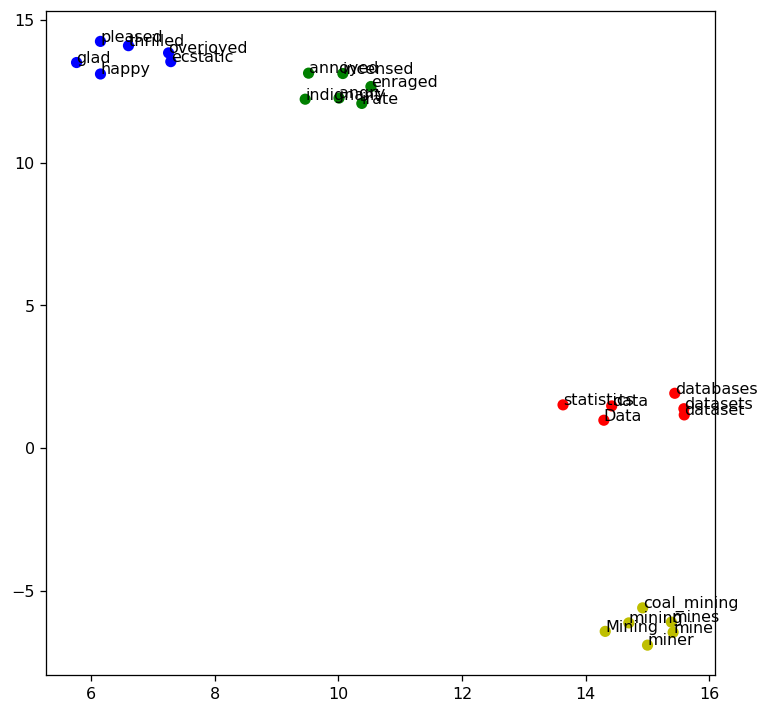

In [297]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
##設定training data來訓練模型，否則模型只看到這24個字，可能不知道如何將這些字分群
word_train = target_words + all_word[:size]
X_train = model[word_train]
print(X_train.shape) #(words, dimension)

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [317]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']
topn = 14
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

# print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'happy', 'glad', 'plea

(360, 300)


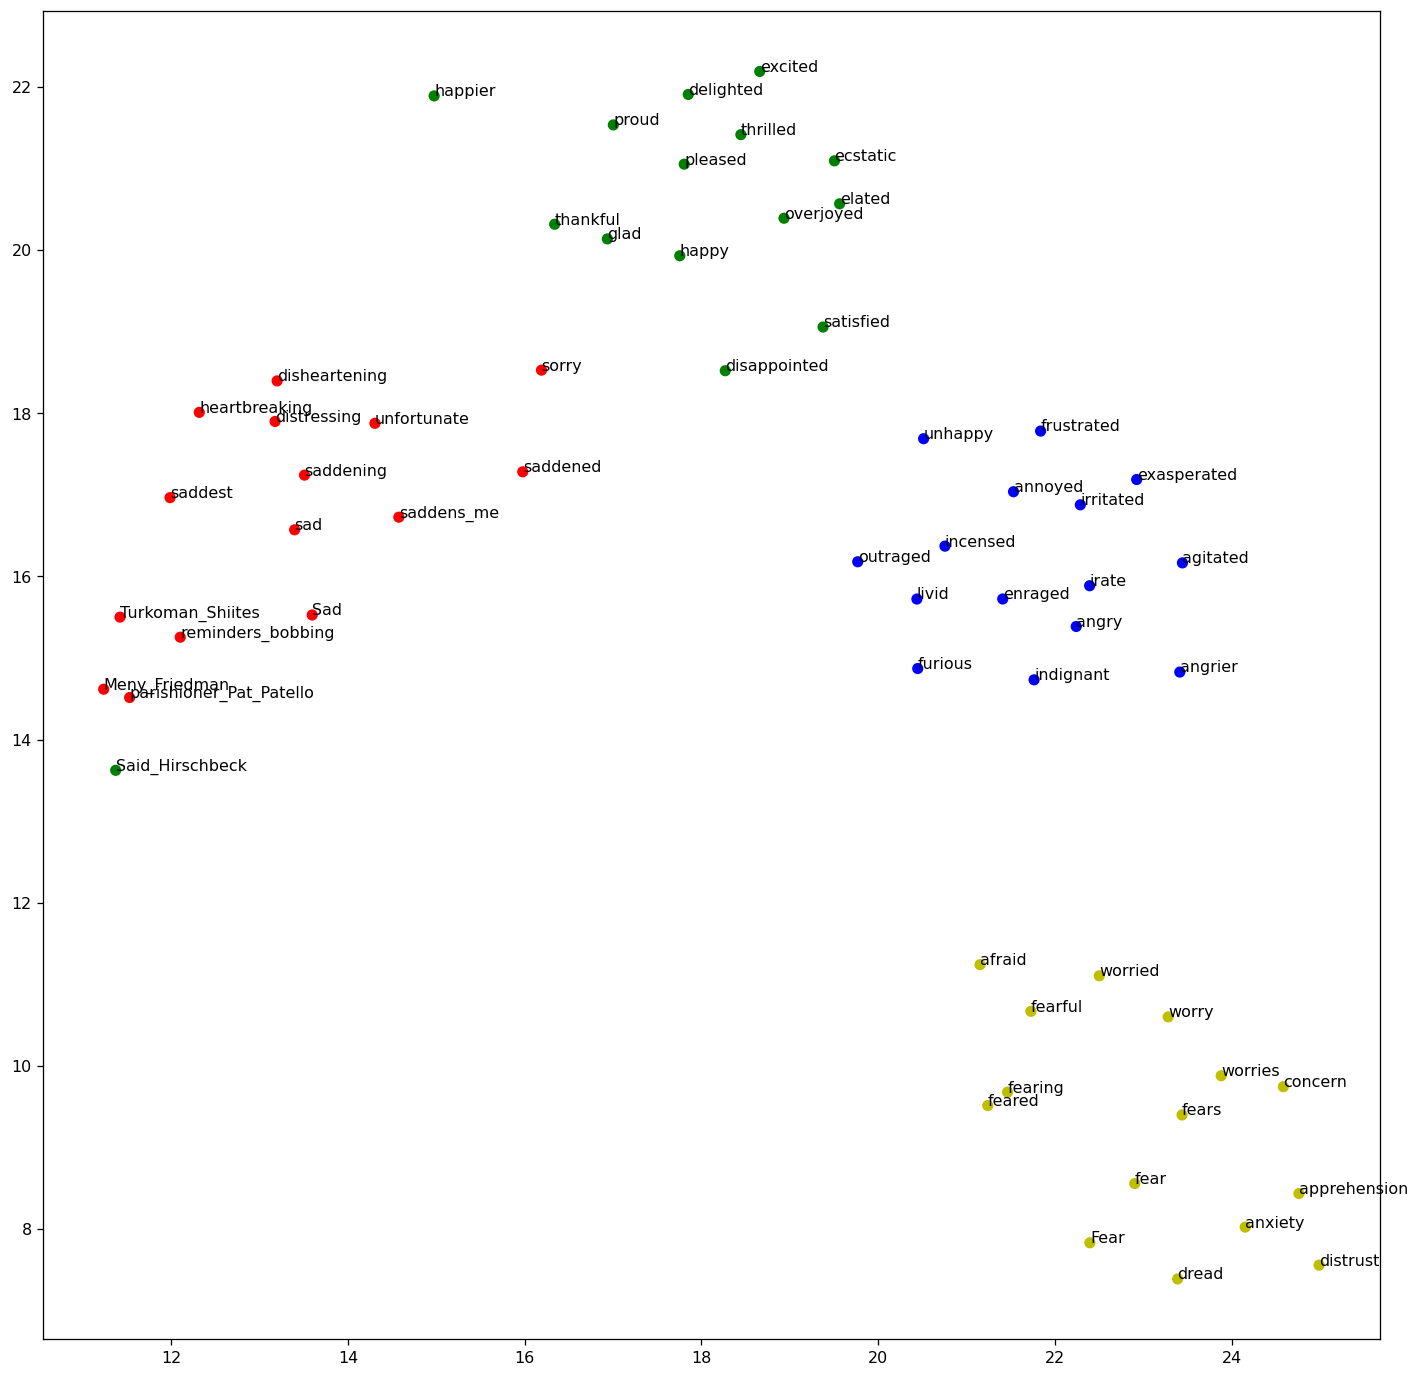

In [325]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 300
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]
print(X_train.shape) #(words, dimension)


## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(15,15), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---